In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression

In [2]:
df_all = pd.read_csv('fanfic_regression_data_curated.tsv', sep = '\t')

In [3]:
len(df_all)

609812

In [4]:
df_all['Term_novelty'].head()

0    0.887581
1    0.342318
2    0.854178
3    0.807707
4    0.790260
Name: Term_novelty, dtype: float64

In [5]:
df_all = df_all.replace([np.inf, -np.inf], np.nan)
df_all = df_all.fillna(0)

In [6]:
len(df_all)

609812

In [7]:
# from statsmodels.stats.outliers_influence import variance_inflation_factor


In [8]:
# df_all = df_all.replace([np.inf, -np.inf], np.nan)
# df_all = df_all.dropna(how = 'any')

In [9]:
# df_all = df_all[['Chapters',\
#         'Term_novelty', 'Term_novelty_squared', 'Topic_novelty', 'Topic_novelty_squared',\
#         'Freq_relationship', 'Category_F_M',\
#        'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
#        'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
#        'ArchiveWarnings_choose_no', 'ArchiveWarnings_no_apply',\
#        'ArchiveWarnings_violence','ArchiveWarnings_noncon',\
#        'author_fic_cnt', 'Rating_G',\
#        'Rating_M', 'Rating_N', 'Rating_T',\
#        'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
#        'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
#        'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
#        'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
#        'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
#        'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
#        'Fandom_ms_paint_adventures', 'Fandom_marvel',
#        'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
#        'History']]

In [10]:
# for i in range(len(df_all.columns.values)):
#     print(df_all.columns.values[i], variance_inflation_factor(df_all.values, i))

### Logistic

In [11]:
df_all.columns.values

array(['Bookmarks', 'ChapterIndex', 'Chapters', 'Comments', 'Hits',
       'Kudos', 'Words', 'Term_novelty', 'Topic_novelty',
       'Freq_relationship', 'Category_F_F', 'Category_F_M',
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other',
       'Category_Unknown', 'ArchiveWarnings_underage',
       'ArchiveWarnings_death', 'ArchiveWarnings_choose_no',
       'ArchiveWarnings_no_apply', 'ArchiveWarnings_violence',
       'ArchiveWarnings_noncon', 'author_fic_cnt', 'Rating_E', 'Rating_G',
       'Rating_M', 'Rating_N', 'Rating_T', 'Fandom_harry_potter',
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_

In [12]:
def run_logit(df, field):
    df['Intercept'] = 1.0
    df['binary'] = df[field].apply(lambda x: 1 if x != 0.0 else 0)
    logit_model = sm.Logit(df['binary'], df[['Chapters',\
        'Term_novelty', 'Topic_novelty', \
        'Freq_relationship', 'Category_F_M',\
       'Category_Gen', 'Category_M_M', 'Category_Multi', 'Category_Other','Category_Unknown', \
       'ArchiveWarnings_underage', 'ArchiveWarnings_death',\
       'ArchiveWarnings_choose_no', 'ArchiveWarnings_noncon',\
       'ArchiveWarnings_violence',\
       'author_fic_cnt', 'Rating_G',\
       'Rating_M', 'Rating_N', 'Rating_T',\
       'Fandom_dcu', 'Fandom_doctor_who', 'Fandom_star_wars',
       'Fandom_arthurian', 'Fandom_supernatural', 'Fandom_haikyuu',
       'Fandom_kuroko_no_basuke', 'Fandom_hamilton_miranda',
       'Fandom_dragon_age', 'Fandom_the_walking_dead', 'Fandom_buffy',
       'Fandom_les_miserables', 'Fandom_naruto', 'Fandom_tolkien',
       'Fandom_shakespare', 'Fandom_hetalia', 'Fandom_attack_on_titan',
       'Fandom_ms_paint_adventures', 'Fandom_marvel',
       'Fandom_sailor_moon', 'Fandom_one_direction', 'Fandom_sherlock',
        'Intercept']]).fit(method='bfgs')
    pred = logit_model.predict()
    df['nonzero_prob'] = pred
    return df

### OLS

In [13]:
def run_ols(df, field):
    df = run_logit(df, field)
    df = df[df[field] != 0]
    df['Kudos'] = np.log(df['Kudos'])
    df['Hits'] = np.log(df['Hits'])
    df['Comments'] = np.log(df['Comments'])
    df['Bookmarks'] = np.log(df['Bookmarks'])
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(how = 'any')
    model = ols( field + " ~ Term_novelty  + Topic_novelty \
 + Chapters + Freq_relationship + author_fic_cnt  \
 + Category_Gen + Category_F_M + Category_M_M + Category_Multi + Category_Other + Category_Unknown \
 + ArchiveWarnings_underage + ArchiveWarnings_death + ArchiveWarnings_violence +\
 ArchiveWarnings_choose_no +\
 ArchiveWarnings_noncon + Rating_N + Rating_E + Rating_M + Rating_T\
 + Fandom_dcu + Fandom_doctor_who + Fandom_star_wars + Fandom_arthurian + \
 Fandom_supernatural + Fandom_haikyuu + Fandom_kuroko_no_basuke + Fandom_hamilton_miranda\
 + Fandom_dragon_age + Fandom_the_walking_dead + Fandom_buffy + Fandom_les_miserables \
 + Fandom_naruto + Fandom_tolkien + Fandom_shakespare + Fandom_hetalia + \
 Fandom_attack_on_titan + Fandom_ms_paint_adventures +\
 Fandom_marvel + Fandom_sailor_moon + Fandom_one_direction + Fandom_sherlock \
 + nonzero_prob", data = df).fit()
    return model

### Plot coefficients

In [14]:
kudos_model = run_ols(df_all, 'Kudos')
kudos_coef = np.asarray(list(kudos_model.params)[1:-1])
kudos_err = list(kudos_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.078318
         Iterations: 35
         Function evaluations: 73
         Gradient evaluations: 69


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentat

In [15]:
ylabels =['Term novelty', 'Topic novelty','Chapters', \
 'Frequent relationship',' Author work count', 'History'\
 'Category (General)','Category (Female/Male)',' Category (Male/Male) ',' Category (Multiple)','Category (Other)','Category (Unknown)\
 ','ArchiveWarnings (Underage)','ArchiveWarnings (Death)',' ArchiveWarnings (Violence)','ArchiveWarnings (Choose not to use)','\
 ArchiveWarnings (Non-consensual sex)','Rating (Not rated)', 'Rating (Explicit)','Rating (Mature)',' Rating (Teens)\
 ',' Fandom (DC) ',' Fandom (Doctor Who) ',' Fandom (Star Wars) ',' Fandom (Arthurian Mythologies)',\
  'Fandom (Supernatural)','Fandom (Haikyuu)',' Fandom (Kuroko no Basuke)',' Fandom (Hamilton (by Miranda))\
 ',' Fandom (Dragon Age)',' Fandom (The Walking Dead)',' Fandom (Buffy the Vampire Slayer)','Fandom (Les Miserables)\
 ',' Fandom (Naruto)','Fandom (Works of J.R.R.Tolkien)',' Fandom (Works of William Shakespare)','Fandom (Hetalia: Axis Powers)',' \
 Fandom (Attack on Titan)',' Fandom (MS Paint Adventures)','\
Fandom (Marvel)',' Fandom (Sailor Moon)',' Fandom (One Direction)','Fandom (Sherlock Holmes)'][::-1]

In [16]:
hits_model = run_ols(df_all, 'Hits')
hits_coef = list(hits_model.params)[1:-1]
hits_err = list(hits_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.093319
         Iterations: 35
         Function evaluations: 57
         Gradient evaluations: 53


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


In [17]:
comments_model = run_ols(df_all, 'Comments')
comments_coef = list(comments_model.params)[1:-1]
comments_err = list(comments_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.693147
         Iterations: 0
         Function evaluations: 16
         Gradient evaluations: 4


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCop

In [18]:
bookmarks_model = run_ols(df_all, 'Bookmarks')
bookmarks_coef = list(bookmarks_model.params)[1:-1]
bookmarks_err = list(bookmarks_model.bse)[1:-1]

/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1674: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/discrete/discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: 0.421413
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40


/anaconda3/envs/python36/lib/python3.6/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """
/anaconda3/envs/python36/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCop

In [19]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
rc('text', usetex=True)

In [20]:
# fig, ax = plt.subplots(1,4,figsize = (15,15))
# ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')

# ax[0].set_yticks(range(len(kudos_coef)))
# ax[0].set_yticklabels(ylabels)
# ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
# ax[0].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[0].set_ylim(-0.5,43.5)
# ax[0].set_xlim(-3,6)
# ax[0].set_xlabel('Kudos', fontsize=15)
# ax[0].set_title('R-squared = 0.256', fontsize=15)
# for tick in ax[0].yaxis.get_major_ticks():
#     tick.label.set_fontsize(13)
# for tick in ax[0].xaxis.get_major_ticks():
#     tick.label.set_fontsize(13)
    
# ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
# ax[1].set_yticks(range(len(hits_coef)))
# # ax[1].set_yticklabels(ylabels)
# ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
# ax[1].plot(range(-8,10), [21.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,10), [25.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,10), [30.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,10), [36.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
# ax[1].plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7)
# ax[1].set_ylim(-0.5,43.5)
# ax[1].set_xlim(-3,8.5)
# ax[1].set_yticklabels([])
# ax[1].set_title('R-squared = 0.209', fontsize=15)
# ax[1].set_xlabel('Hits', fontsize=15)
# for tick in ax[1].xaxis.get_major_ticks():
#     tick.label.set_fontsize(13)
    
# ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
# ax[2].set_yticks(range(len(comments_coef)))
# ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
# ax[2].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[2].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[2].set_ylim(-0.5,43.5)
# ax[2].set_xlim(-2,3)
# ax[2].set_yticklabels([])
# ax[2].set_title('R-squared = 0.062', fontsize=15)
# ax[2].set_xlabel('Comments', fontsize=15)
# for tick in ax[2].xaxis.get_major_ticks():
#     tick.label.set_fontsize(13)

# ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
# ax[3].set_yticks(range(len(bookmarks_coef)))
# ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
# ax[3].plot(range(-8,8), [21.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,8), [25.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,8), [30.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,8), [36.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[3].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7)
# ax[3].set_ylim(-0.5,43.5)
# ax[3].set_xlim(-3,6)
# ax[3].set_yticklabels([])
# ax[3].set_title('R-squared =  0.266', fontsize=15)
# ax[3].set_xlabel('Bookmarks', fontsize=15)
# for tick in ax[2].xaxis.get_major_ticks():
#     tick.label.set_fontsize(13)
    
# fig.text(0.55, 0.001, 'N = 662793', fontsize = 15)
# plt.tight_layout()
# plt.savefig('ols_coefs_full_twoparts.pdf', format='pdf')

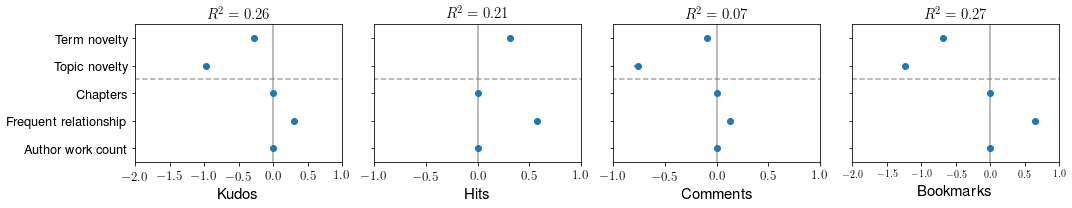

In [24]:
fig, ax = plt.subplots(1,4,figsize = (15,3))
ax[0].errorbar(kudos_coef[::-1], range(len(kudos_coef)), xerr=kudos_err[::-1] , fmt='o')

ax[0].set_yticks(range(len(kudos_coef)))
ax[0].set_yticklabels(ylabels)
ax[0].plot([0 for i in range(len(kudos_coef)+2)], range(-1,len(kudos_coef)+1), c='grey', alpha = 0.7)
ax[0].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[0].set_ylim(36.5,41.5)
ax[0].set_xlim(-2,1)
ax[0].set_xlabel('Kudos', fontsize=15)
ax[0].set_title('$R^2 = 0.26$', fontsize=15)
for tick in ax[0].yaxis.get_major_ticks():
    tick.label.set_fontsize(13)
for tick in ax[0].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[1].errorbar(hits_coef[::-1], range(len(hits_err)), xerr=hits_err[::-1], fmt='o')
ax[1].set_yticks(range(len(hits_coef)))
# ax[1].set_yticklabels(ylabels)
ax[1].plot([0 for i in range(len(hits_coef)+2)], range(-1,len(hits_coef)+1), c='grey', alpha = 0.7)
ax[1].plot(range(-8,10), [39.5 for i in range(-8,10)] ,c='grey', alpha = 0.7, ls='dashed')
ax[1].set_ylim(36.5,41.5)
ax[1].set_xlim(-1,1)
ax[1].set_yticklabels([])
ax[1].set_title('$R^2 = 0.21$', fontsize=15)
ax[1].set_xlabel('Hits', fontsize=15)
for tick in ax[1].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
ax[2].errorbar(comments_coef[::-1], range(len(comments_err)), xerr=comments_err[::-1], fmt='o')
ax[2].set_yticks(range(len(comments_coef)))
ax[2].plot([0 for i in range(len(comments_coef)+2)], range(-1,len(comments_coef)+1), c='grey', alpha = 0.7)
ax[2].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[2].set_ylim(36.5,41.5)
ax[2].set_xlim(-1,1)
ax[2].set_yticklabels([])
ax[2].set_title('$R^2 = 0.07$', fontsize=15)
ax[2].set_xlabel('Comments', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)

ax[3].errorbar(bookmarks_coef[::-1], range(len(bookmarks_err)), xerr=bookmarks_err[::-1], fmt='o')
ax[3].set_yticks(range(len(bookmarks_coef)))
ax[3].plot([0 for i in range(len(bookmarks_coef)+2)], range(-1,len(bookmarks_coef)+1), c='grey', alpha = 0.7)
ax[3].plot(range(-8,8), [39.5 for i in range(-8,8)] ,c='grey', alpha = 0.7, ls='dashed')
ax[3].set_ylim(36.5,41.5)
ax[3].set_xlim(-2,1)
ax[3].set_yticklabels([])
ax[3].set_title('$R^2 = 0.27$', fontsize=15)
ax[3].set_xlabel('Bookmarks', fontsize=15)
for tick in ax[2].xaxis.get_major_ticks():
    tick.label.set_fontsize(13)
    
# fig.text(0.55, 0.001, 'N = 609716', fontsize = 15)
plt.tight_layout()
plt.savefig('ols_coefs_partial_twoparts_nosq.pdf', format='pdf')

In [26]:
print(kudos_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Kudos   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     2335.
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:47:21   Log-Likelihood:            -4.4563e+05
No. Observations:              287113   AIC:                         8.914e+05
Df Residuals:                  287069   BIC:                         8.918e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [27]:
print(hits_model.summary())

                            OLS Regression Results                            
Dep. Variable:                   Hits   R-squared:                       0.209
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     1767.
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:47:21   Log-Likelihood:            -4.3096e+05
No. Observations:              287113   AIC:                         8.620e+05
Df Residuals:                  287069   BIC:                         8.625e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [28]:
print(comments_model.summary())

                            OLS Regression Results                            
Dep. Variable:               Comments   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     469.8
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:47:21   Log-Likelihood:            -3.7865e+05
No. Observations:              287113   AIC:                         7.574e+05
Df Residuals:                  287070   BIC:                         7.578e+05
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

In [29]:
print(bookmarks_model.summary())

                            OLS Regression Results                            
Dep. Variable:              Bookmarks   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     2429.
Date:                Thu, 11 Apr 2019   Prob (F-statistic):               0.00
Time:                        19:47:21   Log-Likelihood:            -4.4500e+05
No. Observations:              287113   AIC:                         8.901e+05
Df Residuals:                  287069   BIC:                         8.905e+05
Df Model:                          43                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

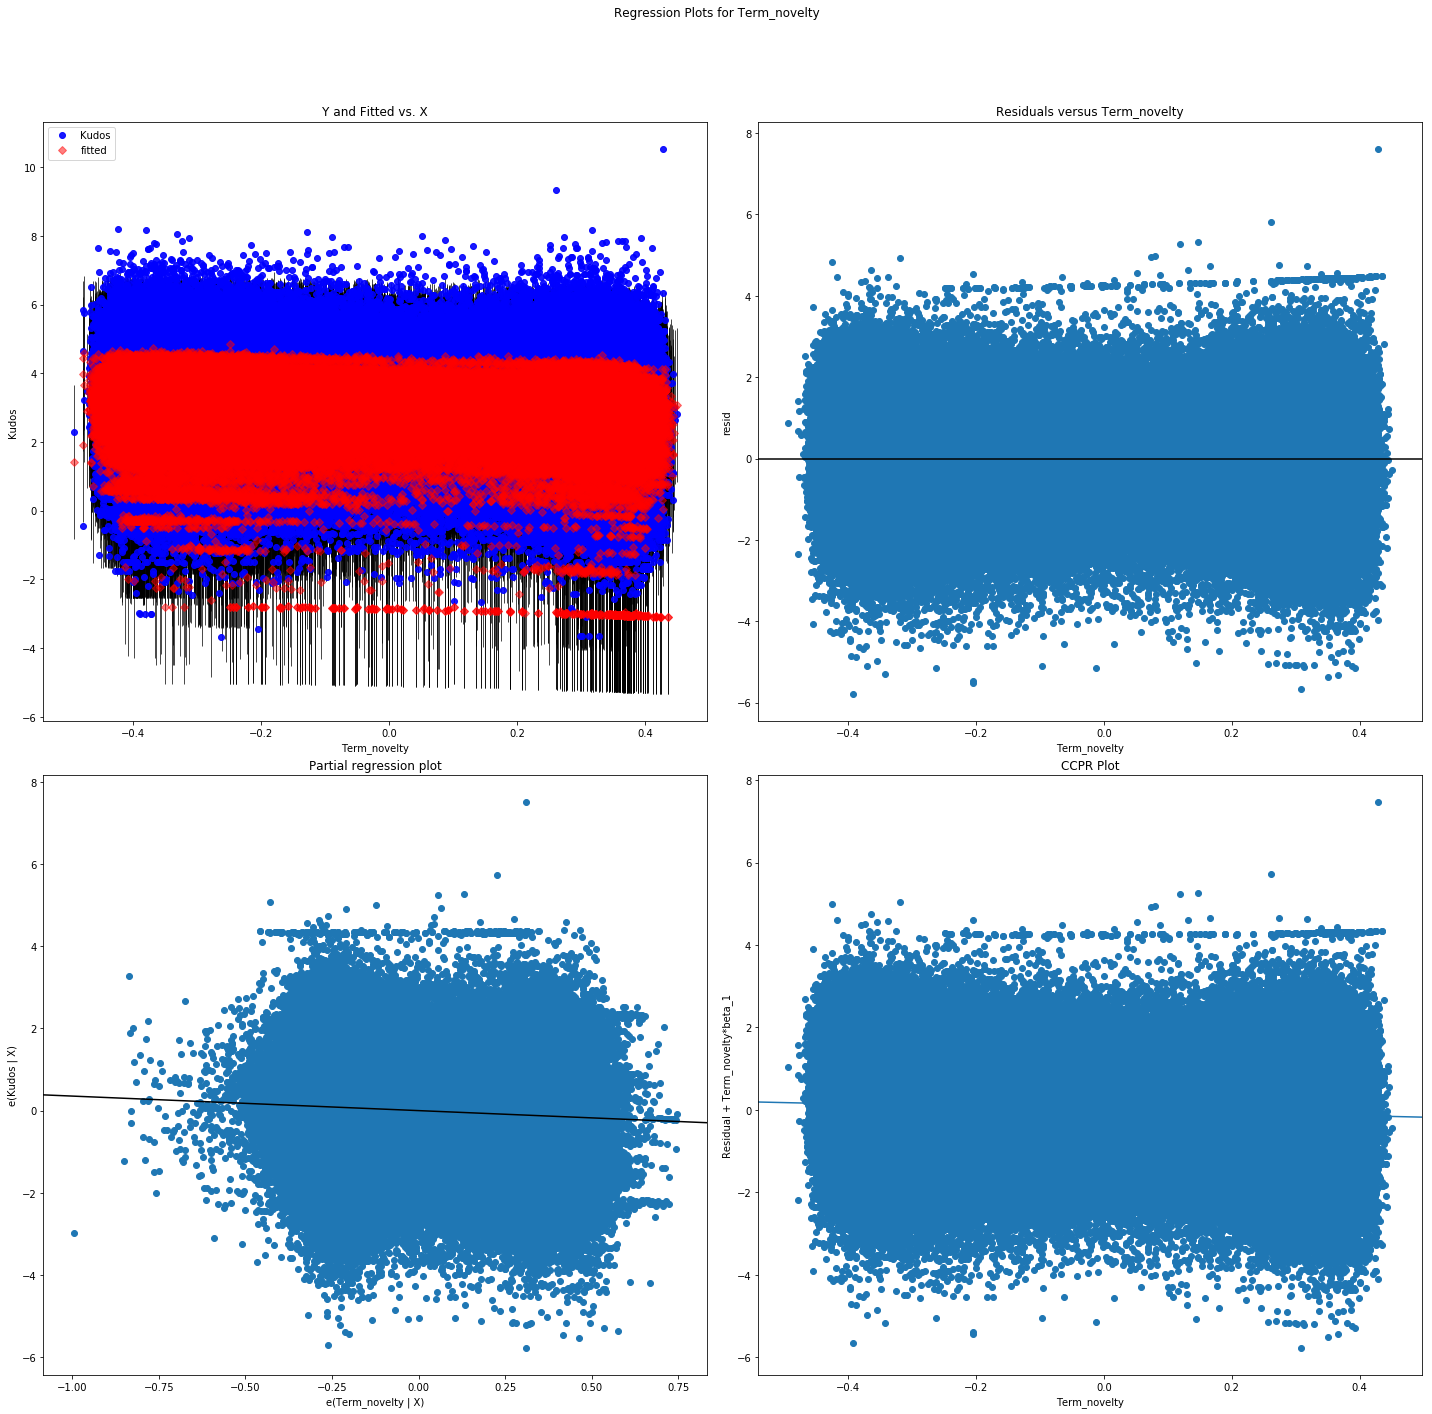

In [24]:
fig = plt.figure(figsize=(20,20))
fig = sm.graphics.plot_regress_exog(kudos_model, "Term_novelty", fig=fig)
plt.savefig('partial_reg_plots_term_novelty.png', format='png')